<a href="https://colab.research.google.com/github/heriswn/LatihanDTS/blob/master/Google_Play_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as plt
import seaborn as sns

In [0]:
data=pd.read_csv("googleplaystore.csv")

In [163]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [164]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Eksplorasi setiap feature
(data memiliki 12 tipe objek dan 1 tipe numerik)

1. Size
2. Installs
3. Reviews
4. Rating
5. Type
6. Price
7. Category
8. Content Rating
9. Genres
10. Last Updated
11. Current Version
12. Android Version

## Size

In [165]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [166]:
data.Size.value_counts()
data.Size.head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

Dapat dilihat ada satuan kilo (k) dan Mega (M). Replace k dan M dengan nilai sesuai nilainya.

In [167]:
data.Size=data.Size.str.replace('k','e+3')
data.Size=data.Size.str.replace('M','e+6')
data.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

Kita punya dua tipe nilai dari data Size.
1. nilai exponensial (belum di convert ke string)
2. Strings (tidak bisa diconvert ke numerik)

In [0]:
#def is_convertable(v):
#    try:
#        float(v)
#        return True
#    except ValueError:
#        return False
#    
#temp=data.Size.apply(lambda x: is_convertable(x))
#temp.head()

Sekarang cek nilai non numerik

In [0]:
#data.Size[~temp].value_counts()

* Replace 'Varies with device' oleh nan dan
* convert 1000+ to 1000 jadi numerik

In [0]:
data.Size=data.Size.replace('Varies with device',np.nan)
data.Size=data.Size.replace('1,000+',1000)

Convert data Size setelah dibersihkan

In [0]:
data.Size=pd.to_numeric(data.Size)

In [0]:
data['Size'] = data['Size'].fillna(data['Size'].mean())

isi data kosong dengan mean

## Installs

Cek nilai unik dalam data install

In [173]:
data.Installs.shape

(10841,)

In [174]:
data.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

Dapat dilihat ada 22 nilai unik, yaitu
* 1 -> 0
* 1 -> free (sting)
* dan numerik cuma dengan tanda '+' dan ',' yang harus dihapus untuk mengconvert kedalam numerik

In [175]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.replace('Free',np.nan)
data.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

Cek data

In [0]:
#data.Installs.str.isnumeric().sum()

Artinya ada 1 data yang bukan numerik, yaitu nan (sudah diconvert dari Free ke nan)

In [177]:
#data.Installs=pd.to_numeric(data.Installs)
data.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

## Reviews

Cek semua nilai dalam data reviews

In [178]:
data.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [179]:
data.Reviews.str.isnumeric().sum()

10840

Artinya ada 1 yang bukan numerik. Kita cari!

In [180]:
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Kita bisa saja mengubahnya menjadi numerik tetapi datanya aneh (M : jutaan).maka kita bisa drop (baris) data  

In [0]:
data=data.drop(data.index[10472])

cek baris

In [182]:
data[10471:].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404000.0,100000,Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4100000.0,10000000,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [0]:
data.Reviews=data.Reviews.replace(data.Reviews[~data.Reviews.str.isnumeric()],np.nan)

In [0]:
data.Reviews=pd.to_numeric(data.Reviews)

## Rating

Nilai dari rating diantara 1-5. kita perlu pastikan dengan cara berikut

In [185]:
print("Range: ", data.Rating.min(),"-",data.Rating.max())

Range:  1.0 - 5.0


Cek jenis data untuk melihat apakah perlu dikonversi ke numerik

In [186]:
data.Rating.dtype

dtype('float64')

Data sudah numerik. sekarang cek data yang memiliki nilai null

In [187]:
print(data.Rating.isna().sum(),"null values out of", len(data.Rating))

1474 null values out of 10840


## Type

Cek tipe nilai dan masalah lain

In [188]:
data.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

Ada dua tipe, yaitu free dan paid

In [0]:
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

isi data kosong dengan mean

### Price

Cek nilai unik dari price

In [190]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

data memiliki simbol $ yangmana seharusnya dihapus dan diubah ke numerik

In [0]:
data.Price=data.Price.apply(lambda x: x.strip('$'))

In [0]:
data.Price=pd.to_numeric(data.Price)

### Category

Cek data

In [193]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Tidak ada data pengulangan atau palsu

### Genres

Cek data unik

In [194]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

data dalam format Categoy;Subcategory.
maka kita bagi kedalam dua kolom, satu sebagai category utama dan yang lain kategory kedua, menggunakan '';'' 

* Primary Category

In [195]:
sep = ';'
rest = data.Genres.apply(lambda x: x.split(sep)[0])
data['Pri_Genres']=rest
data.Pri_Genres.head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Pri_Genres, dtype: object

* Secoundary Category

In [196]:
rest = data.Genres.apply(lambda x: x.split(sep)[-1])
rest.unique()
data['Sec_Genres']=rest
data.Sec_Genres.head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Sec_Genres, dtype: object

Buat grup berdasarkan Primary dan Secondary

In [197]:
grouped = data.groupby(['Pri_Genres','Sec_Genres'])
grouped.size().head(15)

Pri_Genres       Sec_Genres        
Action           Action                365
                 Action & Adventure     17
Adventure        Action & Adventure     13
                 Adventure              75
                 Brain Games             1
                 Education               2
Arcade           Action & Adventure     16
                 Arcade                220
                 Pretend Play            1
Art & Design     Action & Adventure      2
                 Art & Design           58
                 Creativity              7
                 Pretend Play            2
Auto & Vehicles  Auto & Vehicles        85
Beauty           Beauty                 53
dtype: int64

buat dua tabel agar lebih dipahami

In [0]:
twowaytable = pd.crosstab(index=data["Pri_Genres"],columns=data["Sec_Genres"])

In [199]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Pri_Genres,Sec_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity


# Checking

In [0]:
data = data.drop(columns=['Genres','Type','Last Updated','Current Ver','Android Ver'],axis=1)

drop data genres type last update current ver android ver

In [201]:
data.isnull().values.any()

False

In [202]:
data.isnull().sum().sum()

0

In [203]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Pri_Genres        0
Sec_Genres        0
dtype: int64

In [204]:
for i in data.columns: 
    if (data[i].dtypes in ['int64','float64']): 
        print('\nAttribute-',i,':',data[i].dtypes) 
        Q1=data[i].quantile(0.25) 
        print('Q1',Q1) 
        Q3=data[i].quantile(0.75) 
        print('Q3',Q3) 
        IQR=Q3-Q1 
        print('IQR',IQR) 
        min=data[i].min() 
        max=data[i].max() 
        min_IQR=Q1-1.5*IQR 
        max_IQR=Q3+1.5*IQR 
        if (min<min_IQR): 
            print('Low outlier is found') 
        if (max>max_IQR): 
            print('High outlier is found')


Attribute- Rating : float64
Q1 4.1
Q3 4.5
IQR 0.40000000000000036
Low outlier is found

Attribute- Reviews : int64
Q1 38.0
Q3 54775.5
IQR 54737.5
High outlier is found

Attribute- Size : float64
Q1 5900000.0
Q3 26000000.0
IQR 20100000.0
High outlier is found

Attribute- Price : float64
Q1 0.0
Q3 0.0
IQR 0.0
High outlier is found


Mencari outlier

In [205]:
data.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [0]:
data.Installs = data.Installs.astype('int64')

mengubah type data dari Installs

In [207]:
data.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [208]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Pri_Genres,Sec_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0.0,Everyone,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0.0,Everyone,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0.0,Everyone,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0.0,Teen,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,0.0,Everyone,Art & Design,Creativity


# Kepopuleran

In [0]:
condition = [
    (data['Installs'] >= 50000000),
    (data['Installs'] >= 500000) & (data['Installs'] < 50000000),
    (data['Installs'] >= 5000) & (data['Installs'] < 500000),
    (data['Installs'] >= 50) & (data['Installs'] < 5000)]
choices = ['Very Populer', 'Populer', 'Ordinary', 'Less Populer']
data['Popularity'] = np.select(condition, choices, default='Not Popular')

Mengkategorikan Apps berdasarkan kepopuleran

In [210]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Pri_Genres,Sec_Genres,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0.0,Everyone,Art & Design,Art & Design,Ordinary
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0.0,Everyone,Art & Design,Pretend Play,Populer


In [0]:
data = data.drop(columns=['App'],axis=1)

drop  data App

# Encode Data

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
data = data.drop(columns=['Category'],axis=1)

drop Category

In [214]:
data.head(2)

,Rating,Reviews,Size,Installs,Price,Content Rating,Pri_Genres,Sec_Genres,Popularity
0,4.1,159,19000000.0,10000,0.0,Everyone,Art & Design,Art & Design,Ordinary
1,3.9,967,14000000.0,500000,0.0,Everyone,Art & Design,Pretend Play,Populer


In [0]:
lb_make = LabelEncoder()
data["Content_Rating_code"] = lb_make.fit_transform(data["Content Rating"])

Encode Content Rating

In [0]:
data = data.drop(columns=['Content Rating'],axis=1)

drop Content Rating

In [217]:
data.head()

,Rating,Reviews,Size,Installs,Price,Pri_Genres,Sec_Genres,Popularity,Content_Rating_code
0,4.1,159,19000000.0,10000,0.0,Art & Design,Art & Design,Ordinary,1
1,3.9,967,14000000.0,500000,0.0,Art & Design,Pretend Play,Populer,1
2,4.7,87510,8700000.0,5000000,0.0,Art & Design,Art & Design,Populer,1
3,4.5,215644,25000000.0,50000000,0.0,Art & Design,Art & Design,Very Populer,4
4,4.3,967,2800000.0,100000,0.0,Art & Design,Creativity,Ordinary,1


In [0]:
data = data.drop(columns=['Pri_Genres'],axis=1)

In [0]:
lb_make = LabelEncoder()
data["Sec_genres_code"] = lb_make.fit_transform(data["Sec_Genres"])

Encode Secound Genres

In [0]:
data = data.drop(columns=['Sec_Genres'],axis=1)

Drop Primary Genres and Secound Genres

In [221]:
data.head()

,Rating,Reviews,Size,Installs,Price,Popularity,Content_Rating_code,Sec_genres_code
0,4.1,159,19000000.0,10000,0.0,Ordinary,1,4
1,3.9,967,14000000.0,500000,0.0,Populer,1,36
2,4.7,87510,8700000.0,5000000,0.0,Populer,1,4
3,4.5,215644,25000000.0,50000000,0.0,Very Populer,4,4
4,4.3,967,2800000.0,100000,0.0,Ordinary,1,16


In [222]:
data.shape

(10840, 8)

In [223]:
data.head()

,Rating,Reviews,Size,Installs,Price,Popularity,Content_Rating_code,Sec_genres_code
0,4.1,159,19000000.0,10000,0.0,Ordinary,1,4
1,3.9,967,14000000.0,500000,0.0,Populer,1,36
2,4.7,87510,8700000.0,5000000,0.0,Populer,1,4
3,4.5,215644,25000000.0,50000000,0.0,Very Populer,4,4
4,4.3,967,2800000.0,100000,0.0,Ordinary,1,16


In [224]:
m=data['Popularity']
data = data.drop(columns='Popularity',axis=1)
data.insert(7,'Popularity',m)
data.head()

,Rating,Reviews,Size,Installs,Price,Content_Rating_code,Sec_genres_code,Popularity
0,4.1,159,19000000.0,10000,0.0,1,4,Ordinary
1,3.9,967,14000000.0,500000,0.0,1,36,Populer
2,4.7,87510,8700000.0,5000000,0.0,1,4,Populer
3,4.5,215644,25000000.0,50000000,0.0,4,4,Very Populer
4,4.3,967,2800000.0,100000,0.0,1,16,Ordinary


# Exploring Correlation in Python

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

Pie Chart

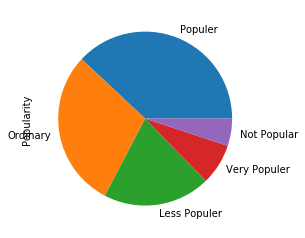

In [226]:
data['Popularity'].value_counts().plot(kind='pie')

Correlation

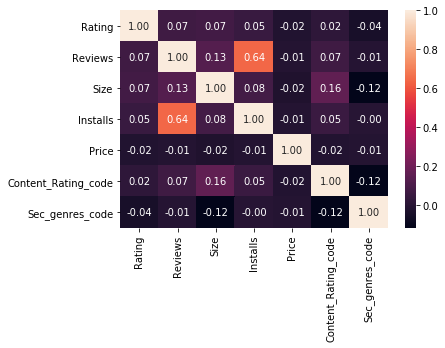

In [227]:
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

# Model

In [0]:
data = data.drop(columns=['Installs'],axis=1)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [0]:
models = {
"knn": KNeighborsClassifier(n_neighbors=1),
"naive_bayes": GaussianNB(),
"decision_tree": DecisionTreeClassifier(),
"random_forest": RandomForestClassifier(n_estimators=100),
}

In [0]:
X=data.iloc[:,: -1].values # Data training
Y=data.iloc[:,-1].values # Target yang di-training

model_names=["knn","naive_bayes","decision_tree","random_forest"]

(trainX, testX, trainY, testY) = train_test_split(X,Y, random_state=3, test_size=0.25)

In [233]:
for model_name in models:
    train=models[model_name].fit(trainX,trainY)
    predicted=train.predict(testX)
    print(model_name,":\n", classification_report(testY,predicted))
    print("\n")

knn :
               precision    recall  f1-score   support

Less Populer       0.66      0.68      0.67       517
 Not Popular       0.36      0.36      0.36       118
    Ordinary       0.74      0.75      0.75       839
     Populer       0.88      0.87      0.87      1061
Very Populer       0.87      0.82      0.84       175

    accuracy                           0.77      2710
   macro avg       0.70      0.69      0.70      2710
weighted avg       0.77      0.77      0.77      2710



naive_bayes :
               precision    recall  f1-score   support

Less Populer       0.42      0.97      0.58       517
 Not Popular       0.00      0.00      0.00       118
    Ordinary       0.51      0.30      0.38       839
     Populer       0.94      0.76      0.84      1061
Very Populer       0.87      0.78      0.82       175

    accuracy                           0.63      2710
   macro avg       0.55      0.56      0.53      2710
weighted avg       0.66      0.63      0.61      2710

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


random_forest :
               precision    recall  f1-score   support

Less Populer       0.78      0.82      0.80       517
 Not Popular       0.54      0.46      0.50       118
    Ordinary       0.87      0.87      0.87       839
     Populer       0.94      0.94      0.94      1061
Very Populer       0.94      0.90      0.92       175

    accuracy                           0.87      2710
   macro avg       0.81      0.80      0.80      2710
weighted avg       0.87      0.87      0.87      2710





# Parameter Random Forest

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(trainX, trainY)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(trainX, trainY)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [248]:
predictions = clf.predict(testX)
print(classification_report(testY, predictions))

              precision    recall  f1-score   support

Less Populer       0.77      0.84      0.80       517
 Not Popular       0.60      0.47      0.53       118
    Ordinary       0.87      0.86      0.87       839
     Populer       0.93      0.92      0.93      1061
Very Populer       0.88      0.85      0.86       175

    accuracy                           0.86      2710
   macro avg       0.81      0.79      0.80      2710
weighted avg       0.86      0.86      0.86      2710



# Catatan Kaki
Note 
- https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3
- Pandas Conditional: https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
- Parameters: https://www.kaggle.com/cesartrevisan/scikit-learn-and-gridsearchcv